In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
# Define the base directory where your files are located using the absolute path
base_path = r'C:\Users\EVOLVE\Documents\Image Classification CNN Keras Dataset-20231226T052357Z-001\Image Classification CNN Keras Dataset\\'

# Concatenate the base path with the file names
X_train_path = base_path + 'input.csv'
Y_train_path = base_path + 'labels.csv'
X_test_path = base_path + 'input_test.csv'
Y_test_path = base_path + 'labels_test.csv'

# Load the data
X_train = np.loadtxt(X_train_path, delimiter=',')
Y_train = np.loadtxt(Y_train_path, delimiter=',')
X_test = np.loadtxt(X_test_path, delimiter=',')
Y_test = np.loadtxt(Y_test_path, delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


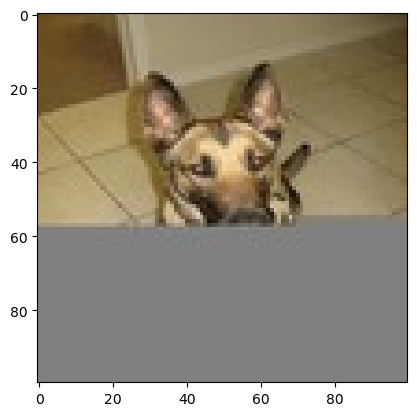

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)


Epoch 1/5


32/32 [==============================] - 11s 286ms/step - loss: 0.7157 - accuracy: 0.5195
Epoch 2/5
32/32 [==============================] - 9s 296ms/step - loss: 0.6829 - accuracy: 0.5480
Epoch 3/5
32/32 [==============================] - 10s 309ms/step - loss: 0.6255 - accuracy: 0.6545
Epoch 4/5
32/32 [==============================] - 11s 328ms/step - loss: 0.5640 - accuracy: 0.7150
Epoch 5/5
32/32 [==============================] - 9s 293ms/step - loss: 0.5136 - accuracy: 0.7475


In [9]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 33ms/step - loss: 0.6084 - accuracy: 0.6575


[0.608370840549469, 0.6575000286102295]

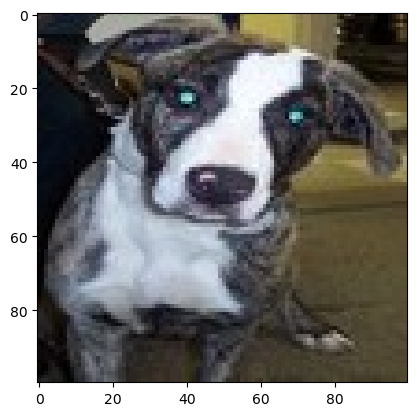

1/1 [==============================] - 0s 32ms/step
Our model says it is a : dog


In [13]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)